## **Import Library**

In [342]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from tqdm import tqdm

## **Data Load**

In [286]:
df = pd.read_csv('/content/drive/MyDrive/Project1_boston_seatle/boston/listings.csv')

## **Price preprocessing**

*   **Object to Float**

In [293]:
price_b = []
for i in df['price']:
  price_b.append(float(i[1:].replace(',','')))
df['price'] = price_b

## **Feature Engineering**

### **Q1) Which columns are influential?**

#### **Corr of Price Column**

In [294]:
price_corr = df.corr()['price'].sort_values(ascending = False).head(6)[1:]
price_corr

square_feet     0.447795
accommodates    0.437756
bedrooms        0.385298
beds            0.370013
bathrooms       0.248234
Name: price, dtype: float64

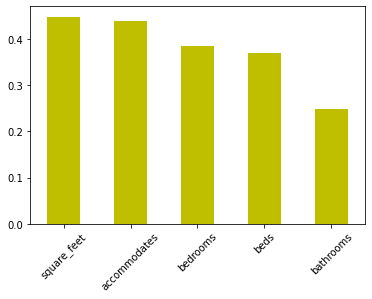

In [295]:
price_corr.plot(kind = 'bar', color = 'y');
plt.xticks(rotation=45);

#### **Result**

It seems that **area variable** is most important. (We can easily guess)

Maybe Accommodates, Bedrooms, Beds... columns are related to **area & price!**

### **Q2) Which street is most expensive?**

#### **Preprocessing Street Column**

- From street column, Extracting Street Name

In [296]:
a = list(df['street'].values)
for i in range(len(a)):
  df['street'][i] = a[i].split(',')[0]

#### **Visualization**

- Top 5 Rich Street By Our Data

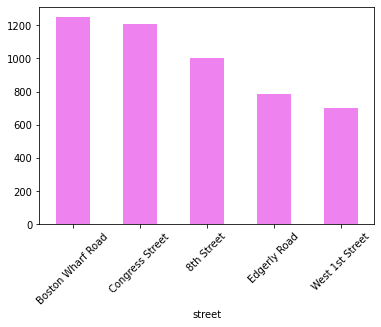

In [297]:
a = df.groupby(df['street'])['price'].mean().sort_values(ascending = False).head(5)
a.plot(kind = 'bar', color = 'violet');
plt.xticks(rotation=45);

#### **Result**

By google map, these streets are near by ocean!

Actually, I'm not living in boston(I'm korean). But I can guess that those streets are rich.

### **Q3) Relationship between Review of AIRBNB Data & Host info**

I wondered about relationship between review data and host-info!

At first, I counted positive & negative words in review data.

And merged this data with DataFrame 'df'

#### **Preprocessing**

*  **Counting Postive & Negative words in Review Data**
*  **Merging DataFrame**
*  **Filling Missing Values (-1)**

In [306]:
df_re = pd.read_csv('/content/drive/MyDrive/Project1_boston_seatle/boston/reviews.csv')
df_re

# --------------------- Positive words counting -------------------# 
ls_good = []
feature_good = ['good', 'clean', 'nice', 'great', 'Great', 'Nice', 'comfortable', 'Good', 'cool', 'Cool', 'Clean', 'enjoyed', 'bien', 'ajustado', 'cozy', 'Cozy']
for c in range(68275):
  n = 0
  try:
    for i in df_re['comments'][c].split():
      if i in feature_good:
        n += 1
      else:
        pass
  except:
    n = 0
  ls_good.append(n)

# --------------------- Negative words counting -------------------# 

  ls_bad = []
feature_bad = ['bad', 'dirty', 'uncomfortable', 'terrible', 'Bad', 'Dirty', 'Uncomfortable', 'sucio', 'malo', 'incómodo']
for c in range(68275):
  n = 0
  try:
    for i in df_re['comments'][c].split():
      if i in feature_bad:
        n += 1
      else:
        pass
  except:
    n = 0
  ls_bad.append(n)

# --------------------- Merging -------------------# 

df_re['counts_good'] = ls_good
df_re['counts_bad'] = ls_bad
df_re = df_re[['listing_id', 'counts_good', 'counts_bad']]
df_re.columns = ['id', 'counts_good', 'counts_bad']
df = pd.merge(df, df_re, on = 'id', how = 'left')

# --------------------- Filling Missing Values -------------------# 

df['counts_good'] = df['counts_good'].fillna(-1)
df['counts_bad'] = df['counts_bad'].fillna(-1)

#### **Visualization**

##### **Review values - Word counts**

100%|██████████| 7/7 [00:13<00:00,  1.92s/it]


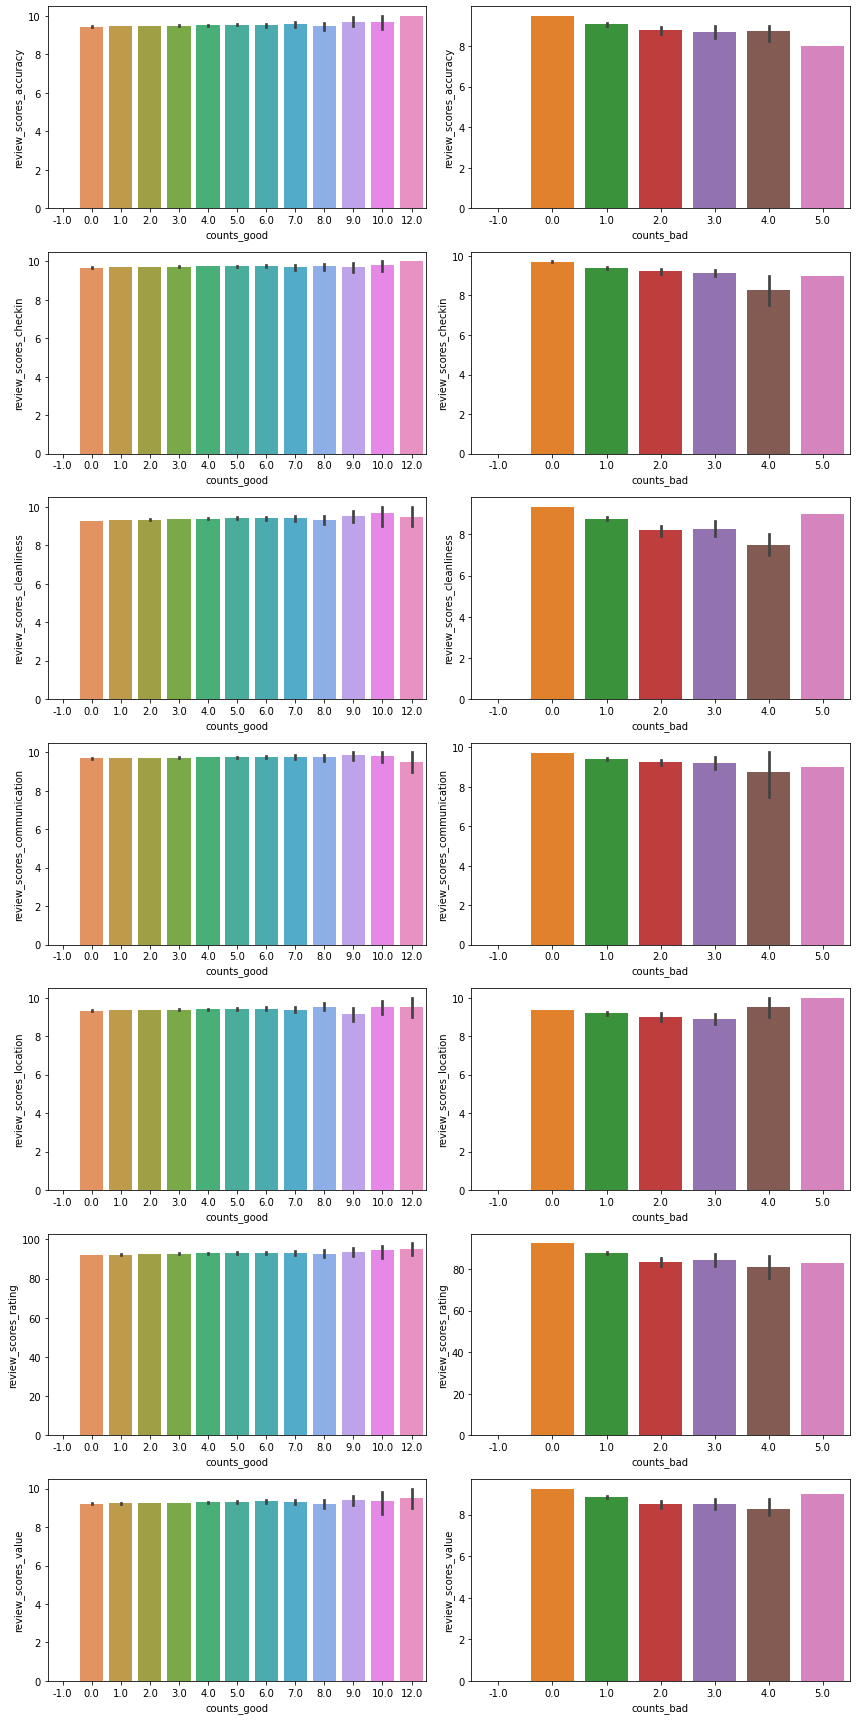

In [356]:
review_cols = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value']

fig, ax = plt.subplots(len(review_cols), 2, figsize=(12,24))

for i in tqdm(range(len(review_cols))):
  sns.barplot(df['counts_good'], df[review_cols[i]], ax = ax[i, 0])
  sns.barplot(df['counts_bad'], df[review_cols[i]], ax = ax[i, 1])

plt.tight_layout()
plt.show()

##### **Price - Word counts**

100%|██████████| 7/7 [00:14<00:00,  2.13s/it]


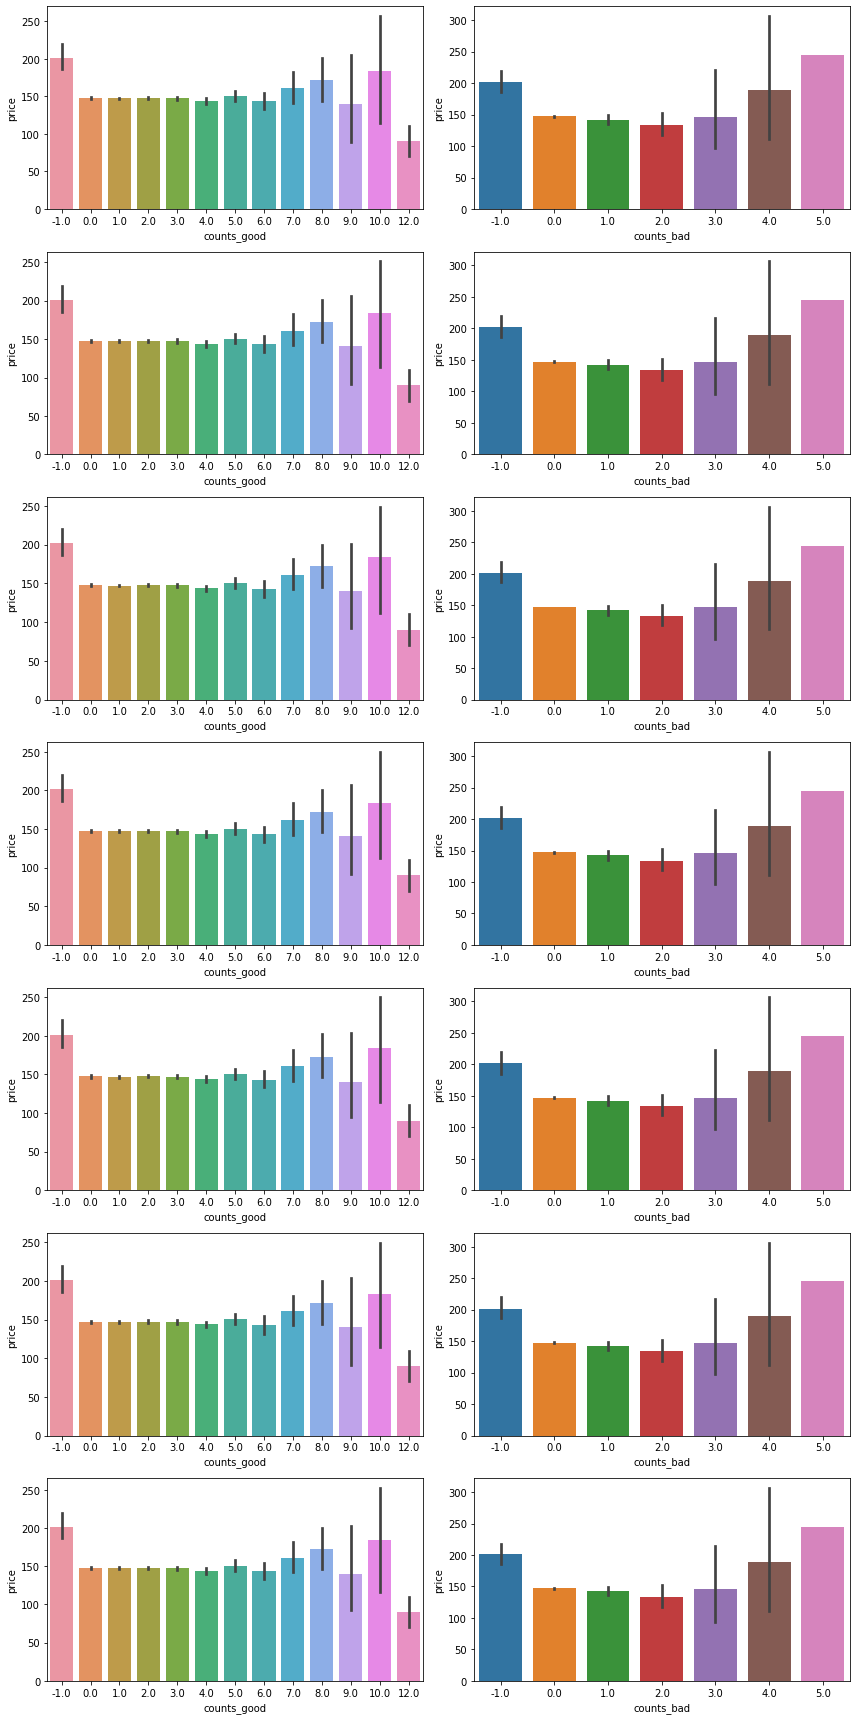

In [357]:
review_cols = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_rating', 'review_scores_value']

fig, ax = plt.subplots(len(review_cols), 2, figsize=(12,24))

for i in tqdm(range(len(review_cols))):
  sns.barplot(df['counts_good'], df['price'], ax = ax[i, 0])
  sns.barplot(df['counts_bad'], df['price'], ax = ax[i, 1])

plt.tight_layout()
plt.show()

#### **Result**

We can see that both distributions of Review values which are seperated by P&N words counts are different!

*   We can conclude that this data is reliable!

If you wanna get more customer, you should analyze of review data and make your own strategy.

There are many bad places that cost more expensive than good places.
I conclude that those who own airbnb which had bad review should change their place cost!
